# Bin Packing Lab

- Authors:
  - Nivetha Kuruparan, kuruparn@mcmaster.ca
  - Tanveer Brar, brart5@mcmaster.ca
- Group ID on Avenue: 20
- Gitlab URL: https://gitlab.cas.mcmaster.ca/brart5/l2-bin-packing

## How to use the provided code?

_(this section is just here for information, you can get rid of it in your own report)_

In [1]:
from macpacking.reader import DatasetReader, BinppReader
from macpacking.model  import Online, Offline
import macpacking.algorithms.offline as offline

Now that the business code is imported, we can load an existing dataset

In [2]:
dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt
  - Bin Capacity: 100
  - Objects to pack: [8, 8, 12, 13, 13, 14, 15, 17, 18, 19, 20, 23, 30, 37, 37, 39, 40, 43, 43, 44, 44, 50, 51, 61, 61, 62, 62, 63, 66, 67, 69, 70, 71, 72, 75, 76, 76, 79, 83, 83, 88, 92, 92, 93, 93, 97, 97, 97, 99, 100]


Acording to the `oracle.xslx` file, we now that the optimal solution for this case is to use _31_ bins. Let's call the baseline algorithm, which is an offline one, and see how it performs.

In [3]:
import macpacking.algorithms.baseline as baseline
strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


So the baseline finds the optimal solution. That's good news! Let's call our very own version of `NextFit`, as an offline algorithm.

In [4]:
import macpacking.algorithms.online as online
strategy: Offline = offline.NextFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 35
[[14, 13, 13, 12, 8, 8], [20, 19, 18, 17, 15], [37, 30, 23], [39, 37], [43, 40], [44, 43], [50, 44], [51], [61], [61], [62], [62], [63], [66], [67], [69], [70], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


Damn it, this algorithm is 4 bins far from the optimal solution! Let's try an online version. Usually, they perform worst, so let's measure it.

In [5]:
strategy: Online = online.NextFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 36
[[13, 61], [15, 70], [19], [20, 23], [37, 43, 14], [39], [40, 8, 18], [43], [44], [44, 50], [51, 30], [61], [62], [62, 37], [63, 17, 13], [66], [67], [69], [71], [72], [75], [76], [76, 8, 12], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


As expected, the online version is worst!

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

## T1 Tasks

##### For the code, explain how it follows the SOLID principles.

The design and structure of the code allow it to follow all of the SOLID principles. Down below is a description of how the code follows each principle.

For The Single Responsibility Principle, all classes in the code base only do one task. For instance, when creating an online algorithm, rather than having multiple functions in that one class that defines the algorithms, the code base separates them into multiple classes. Since there are multiple ways to pack bins online way, it is best to create separate classes to separate the responsibilities (algorithms). 

The Open-Closed Principle requires that classes should be open for extension and closed for modification. This can be seen in the code base as we can easily add new functionality (new offline or online algorithms or new type of dataset reader) without having to modify the existing code. The program also uses interfaces to allow it to be open-closed. 

The Liskov Substitution Principle explains that subclasses should be substitutable for their base classes. This can be seen in the code base as the Online and Offline models are used in the algorithms. All algorithms can inherit from their respective parent class. In addition, the child classes can extend the behaviour as well.

The Interface Segregation Principle requires interfaces to be separate. This can be seen in the code base as both the BinPacker and DatasetReader are kept separate as they have different responsibilities. 

Finally, the Dependency Inversion Principle states that all classes should not depend on concrete classes and functions. As mentioned above the code base depends on interfaces when creating new readers or algorithms.

##### For the dataset, explain the different dimensions used and why they are important for evaluating algorithms. 

There are three different "types" of datasets given to us. The first is in the folder binpp, where there are multiple files with the naming convention N#C#W#. This states the following parameters:

N -> number of items (# = 1, numitems = 50) (# = 2, numitems = 100)
C -> bin capacity (# = 1, capacity = 100) (# = 2, capacity = 100)
W -> weights (# = 1, weights range from 1 - 100) (# = 2, weights range from 20 - 100)

Each file then contains a stream of inputs where the first line contains the number of items, the second line contains the capacity of the bins, and the rest of the lines are all possible weights.

This similar structure can be seen in the files for binpp-hard except for the naming convention.

The jburkardt folder is slightly different from the other two as it separates the capacity and weights into separate files. In addition, it does not state how many weights there are. 

These dimensions (capacity and weights) are extremely important for evaluating algorithms as it is the piece of information needed to create them. The algorithms take the capacity and weights and based on their type, will pack them accordingly. The dataset also contains the optimal solution for each dataset, allowing us to see how each algorithm performed. A comparison between algorithms can be made which can help in terms of evaluation.

##### Implement a new DatasetReader, to support the cases stored in the jburkardt directory.

In [6]:
from macpacking.reader import JburkardtReader

capacity_dataset = '_datasets\jburkardt\p01_c.txt'
weights_dataset = '_datasets\jburkardt\p01_w.txt'
jburkardt_reader: DatasetReader = JburkardtReader(capacity_dataset, weights_dataset)
print(f'  - Bin Capacity: {jburkardt_reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(jburkardt_reader.offline()[1])}')

  - Bin Capacity: 100
  - Objects to pack: [3, 7, 11, 33, 33, 33, 50, 60, 70]


##### Implement the most terrible online bin packing algorithm that can ever exist: this algorithm uses one bin per object.

In [7]:
strategy: Online = online.OneFit()
result = strategy(jburkardt_reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 9
[[3], [7], [11], [33], [33], [33], [50], [60], [70]]


##### Integrate it in the class hierarchy.

![t1_class_heirarchy](uml/t1_class_hierarchy.png)

## T2 Tasks

##### Provide an implementation of the following algorithms:

###### Online: First-Fit

In [8]:
strategy: Online = online.FirstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 44], [44, 43, 13], [50, 43], [51, 39], [61, 13, 20], [61, 37], [62, 23, 15], [62, 37], [63], [66, 30], [67], [69, 8, 18], [70], [71], [72, 14, 12], [75], [76], [76], [79, 19], [83], [83, 17], [88, 8], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


###### Online: Best-Fit

In [9]:
strategy: Online = online.BestFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 44, 12], [44, 43, 13], [50, 43], [51], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67, 30], [69, 17, 14], [70, 18, 8], [71], [72, 23], [75], [76], [76, 19], [79, 20], [83, 13], [83, 15], [88, 8], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


###### Online: Worst-Fit

In [10]:
strategy: Online = online.WorstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 33
[[37, 43], [39, 19], [40, 8, 18, 13], [44, 43], [44, 50], [51, 30], [61, 13], [61, 20], [62, 23], [62, 37], [63, 17], [66, 15], [67, 14], [69, 8], [70, 12], [71], [72], [75], [76], [76], [79], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


###### Offline: First-Fit Decreasing

In [11]:
strategy: Offline = offline.FirstFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71, 13], [72, 14, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


###### Offline: Best-Fit Decreasing

In [12]:
strategy: Offline = offline.BestFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


###### Offline: Worst-Fit Decreasing

In [13]:
strategy: Offline = offline.WorstFit()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40, 39], [43, 43], [50, 44], [51, 44], [61, 37], [61, 37], [62, 23], [62, 30], [63, 20], [66, 19], [67, 18], [69, 17], [70, 15], [71, 14], [72, 13], [75, 13], [76, 8], [76, 12], [79, 8], [83], [83], [88], [92], [92], [93], [93], [97], [97], [97], [99], [100]]


##### Implement a way to evaluate a given solution, by measuring KPIs related to number of bins used, and any other things that can be useful to characterize a solution.

Benchmarking for Online Algorithms:


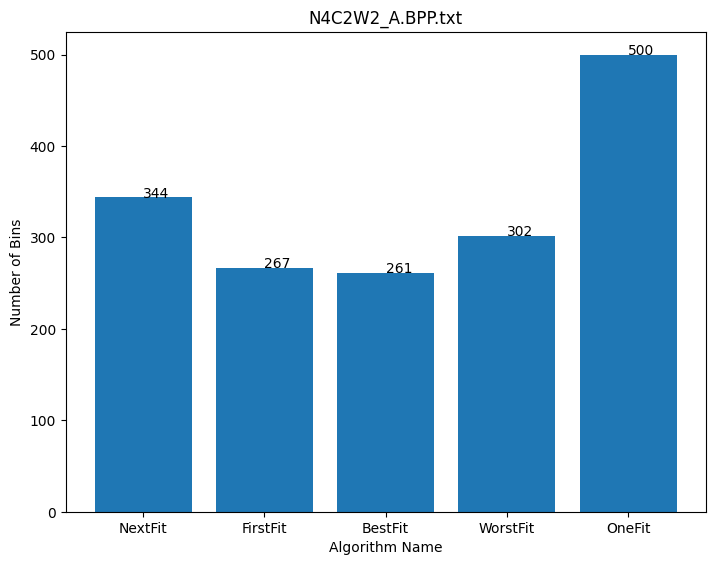

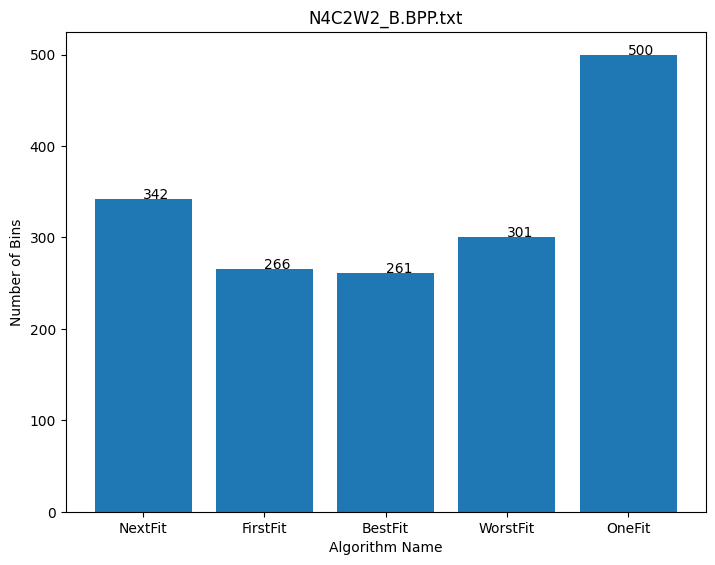

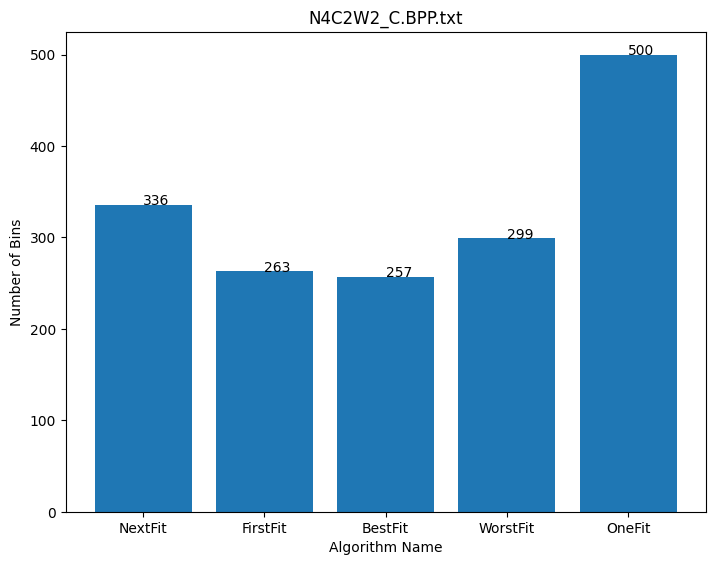

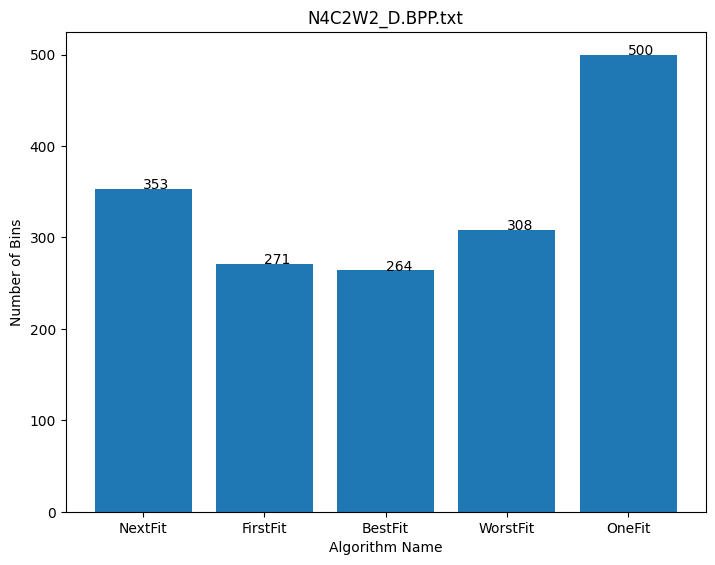

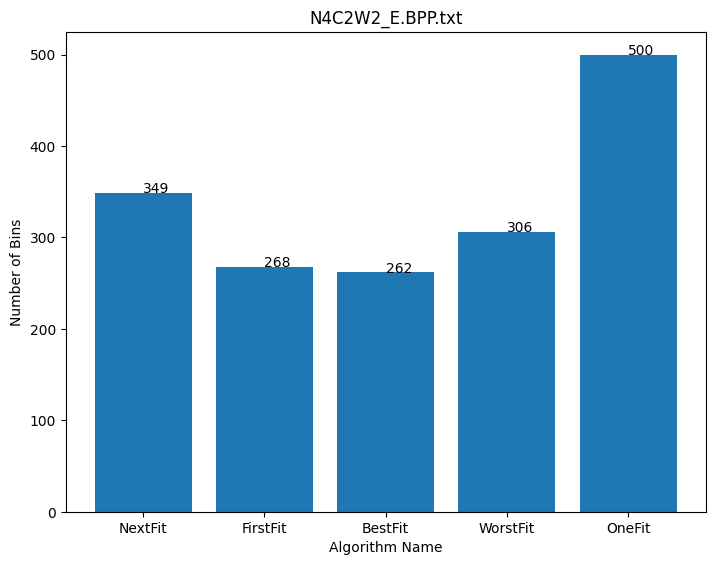

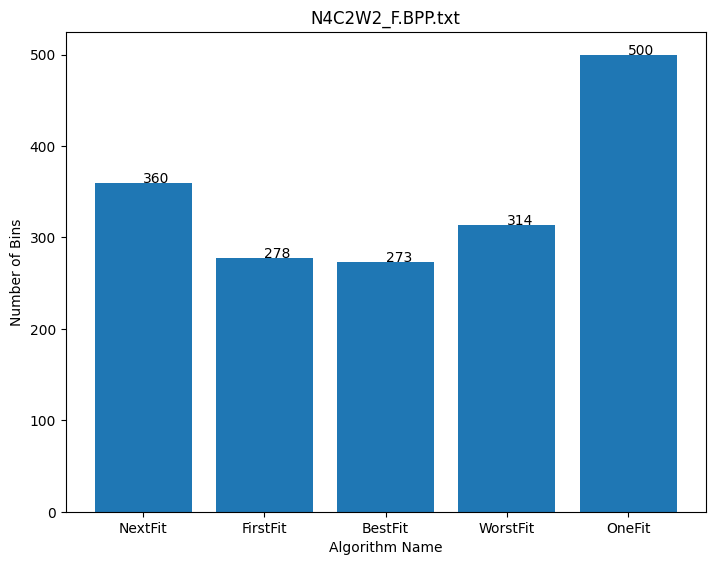

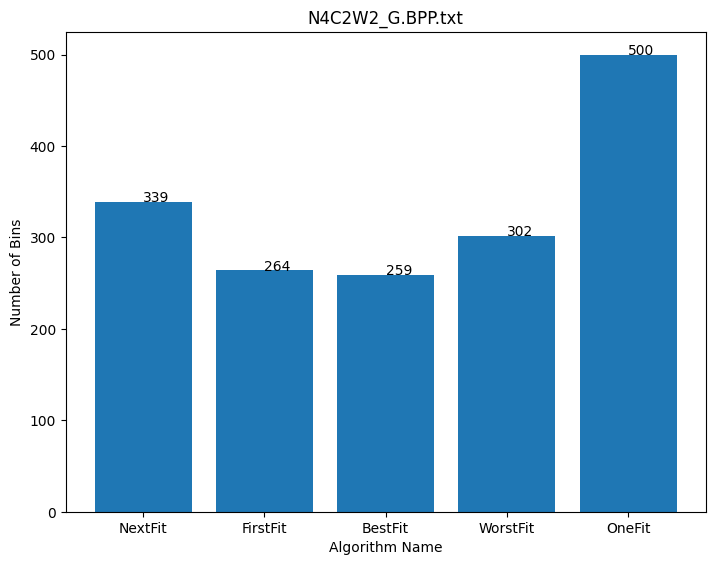

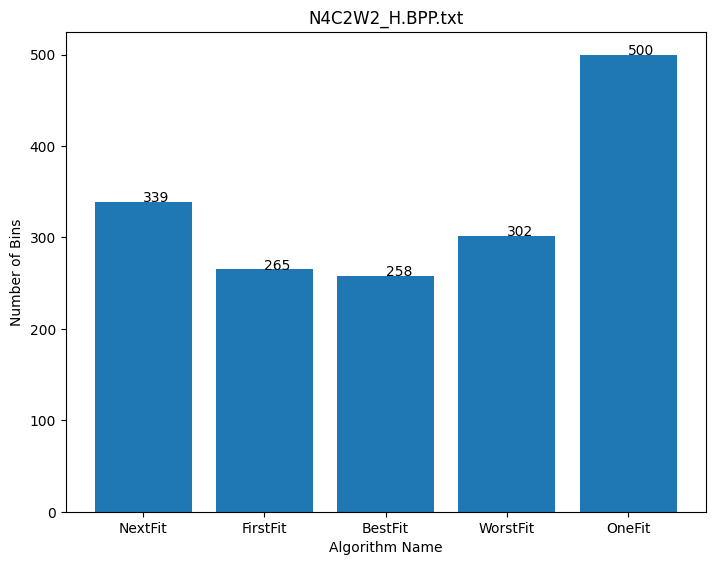

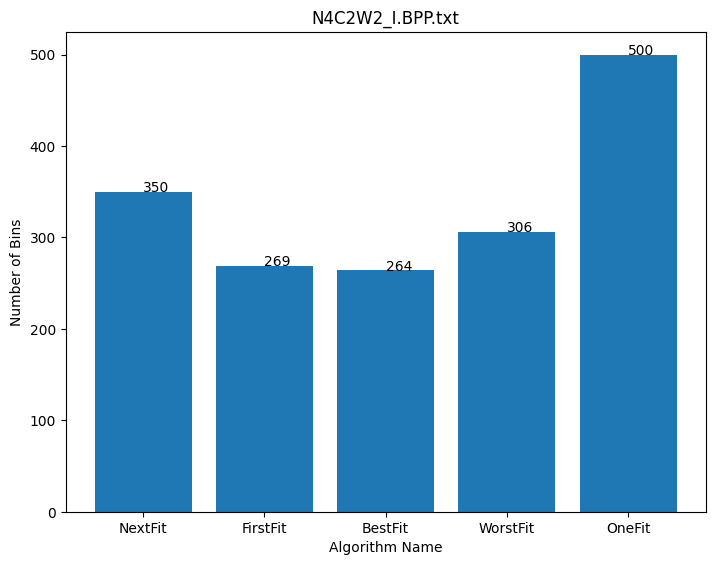

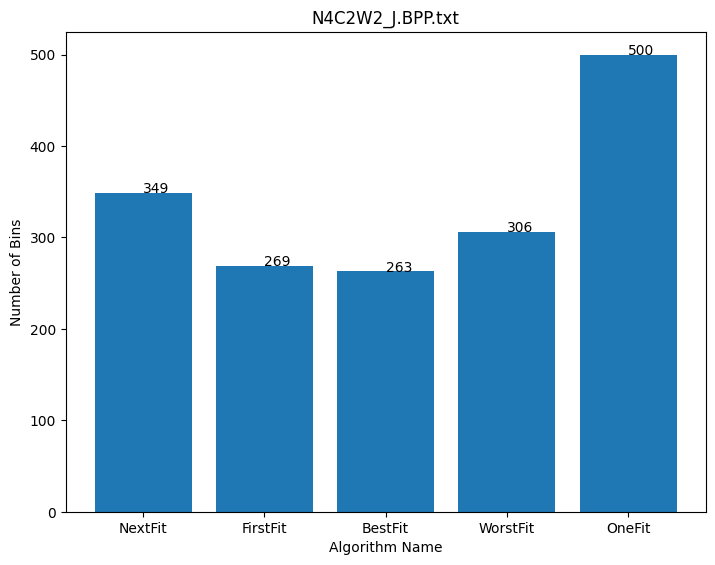

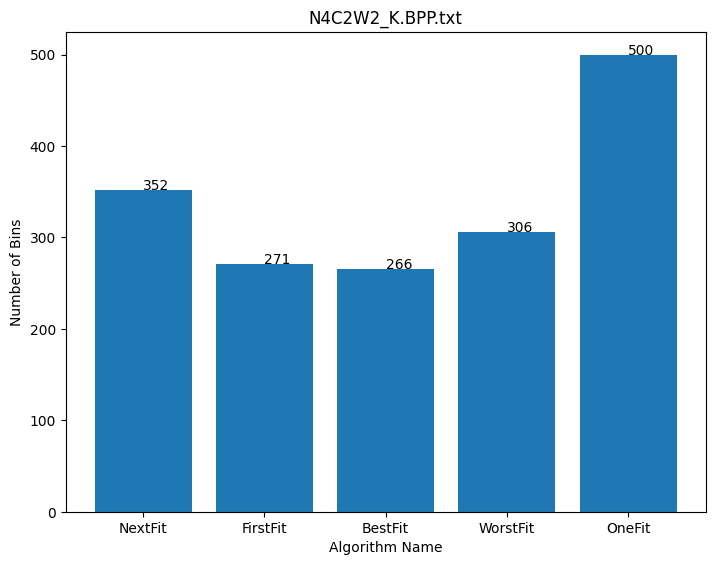

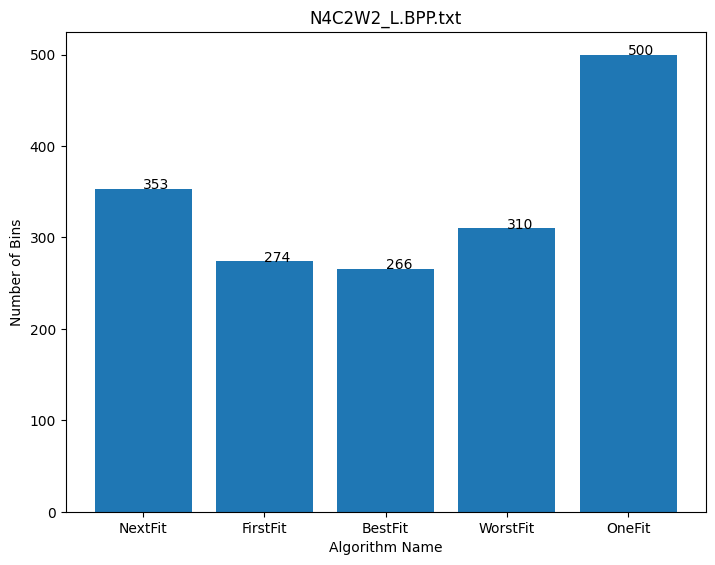

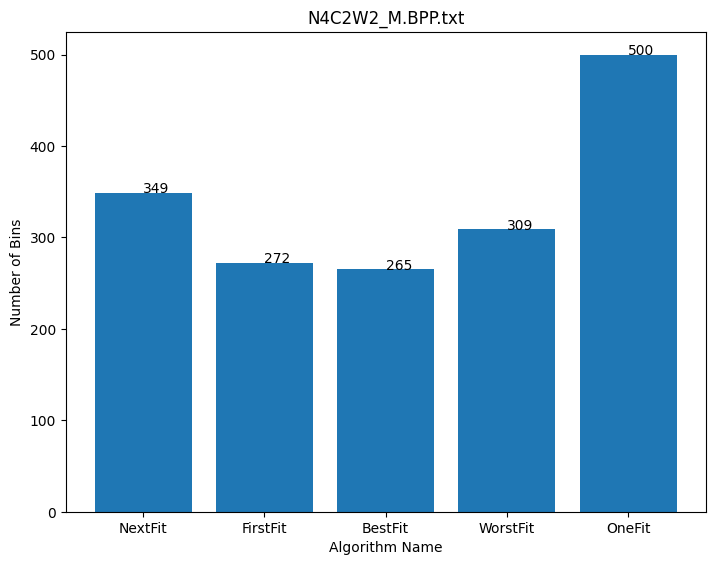

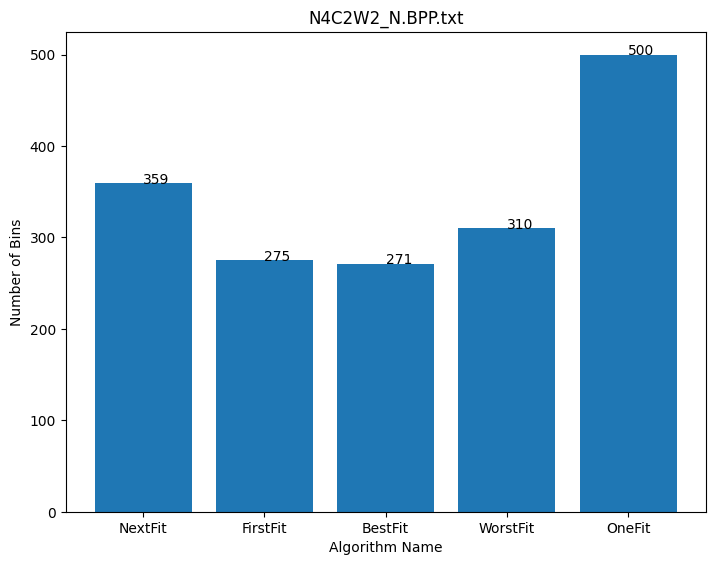

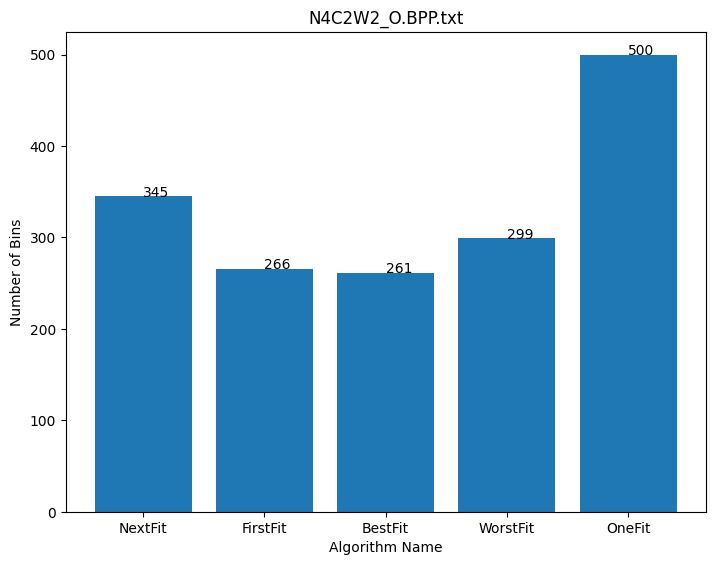

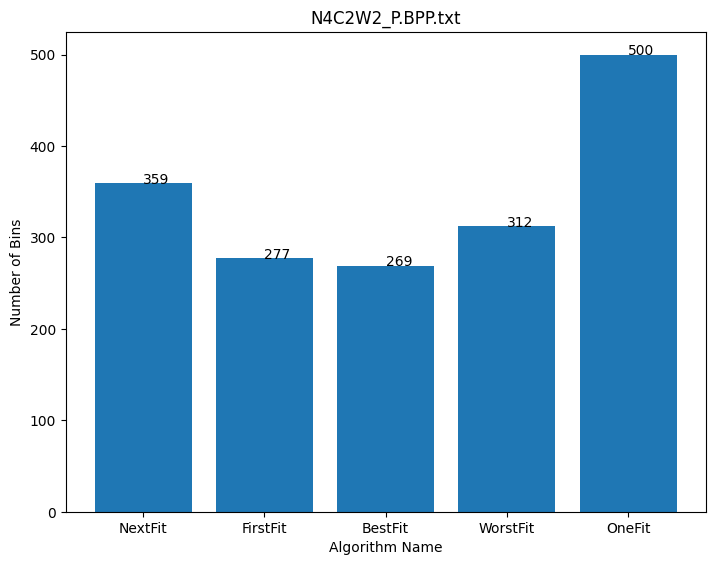

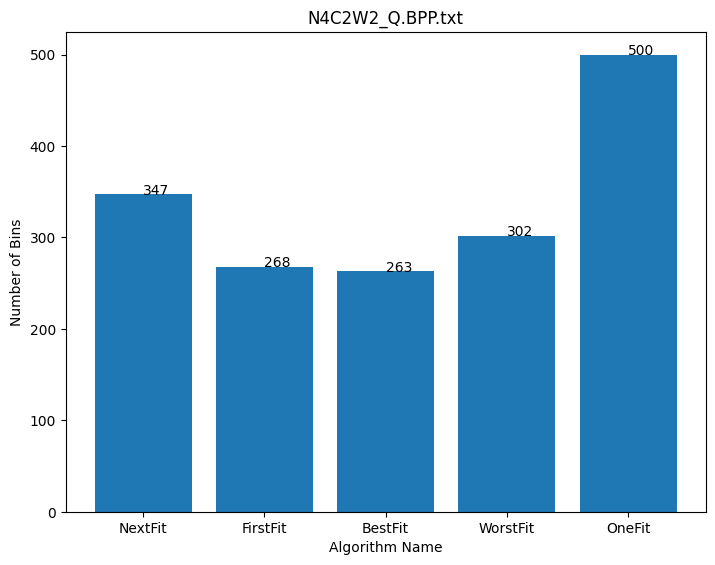

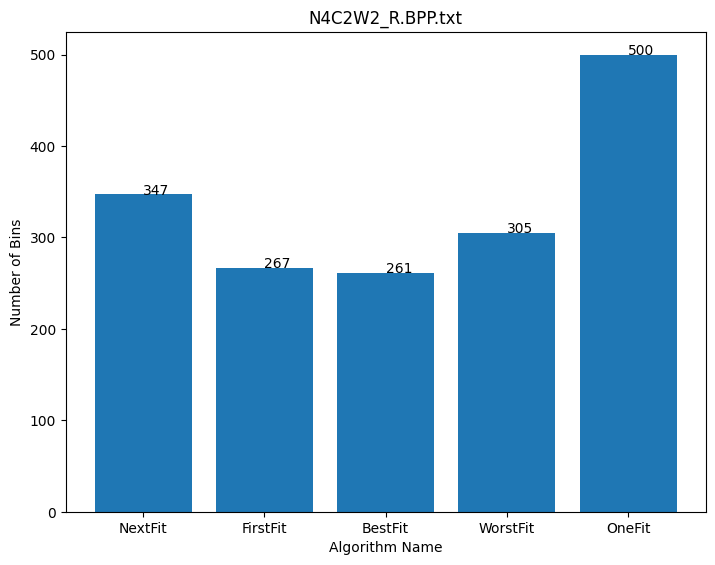

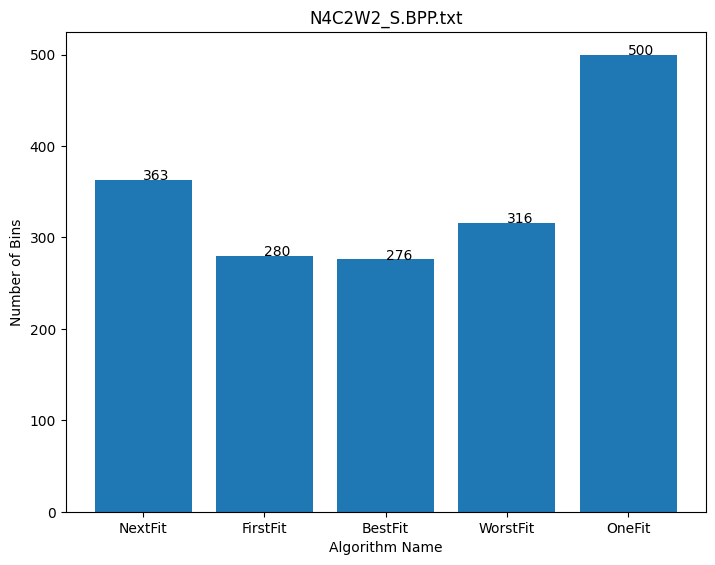

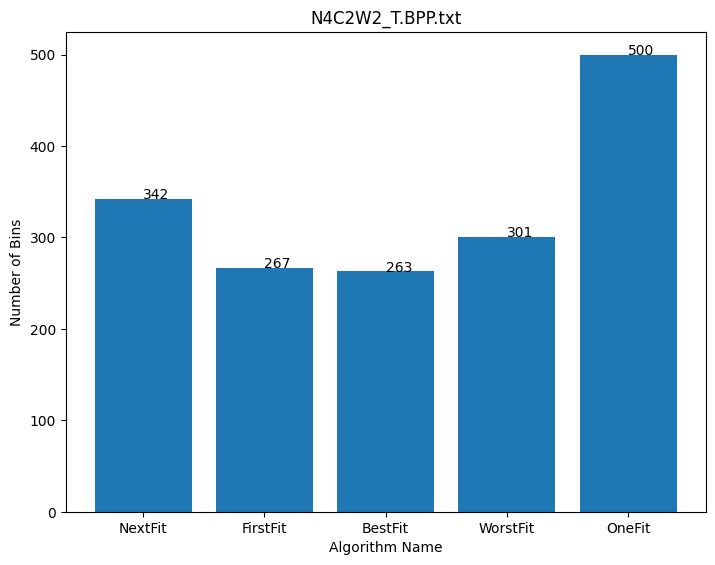

Benchmarking for Offline Algorithms:


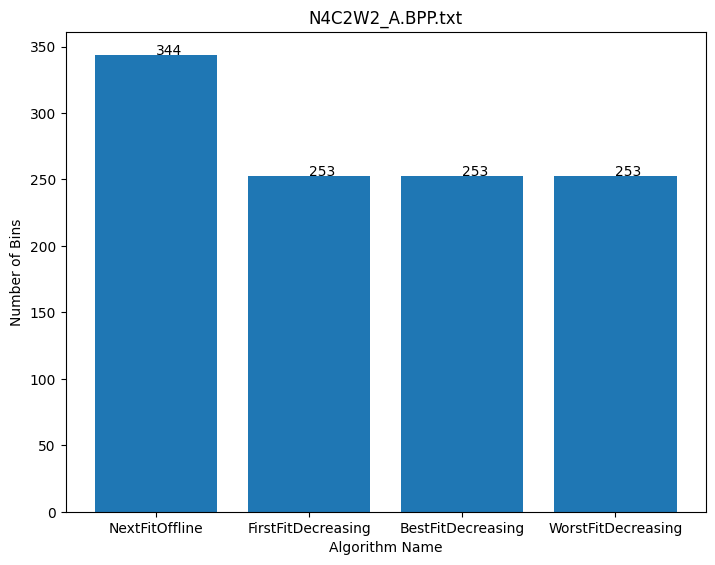

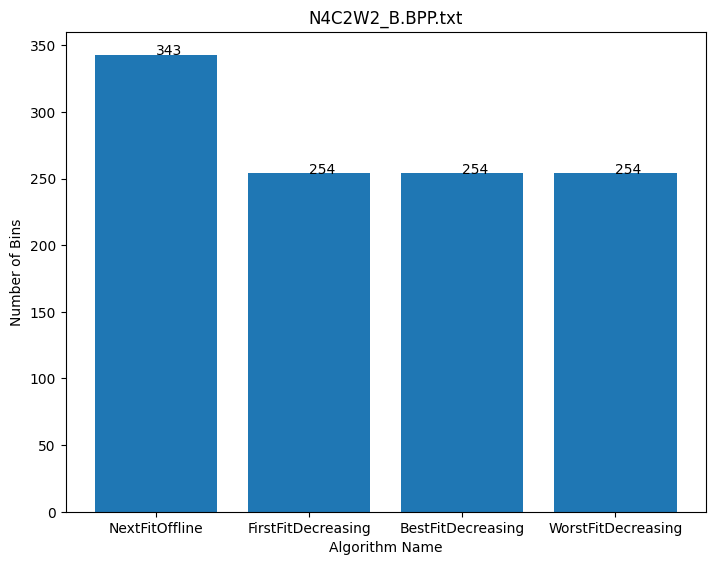

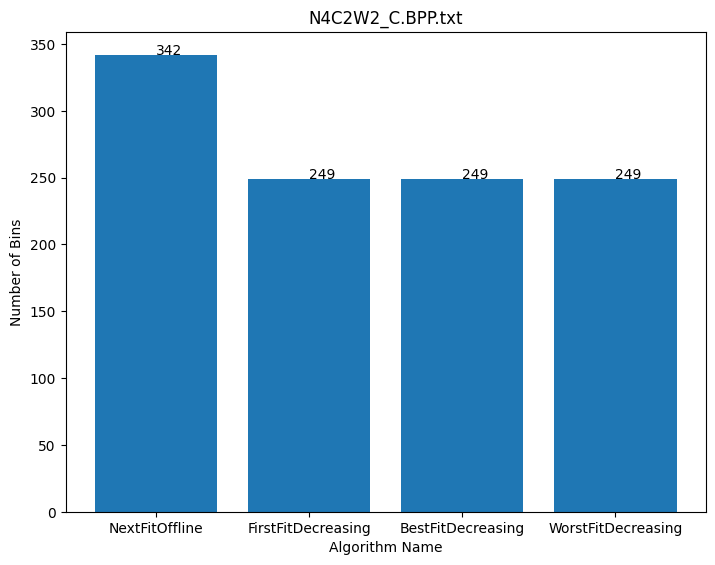

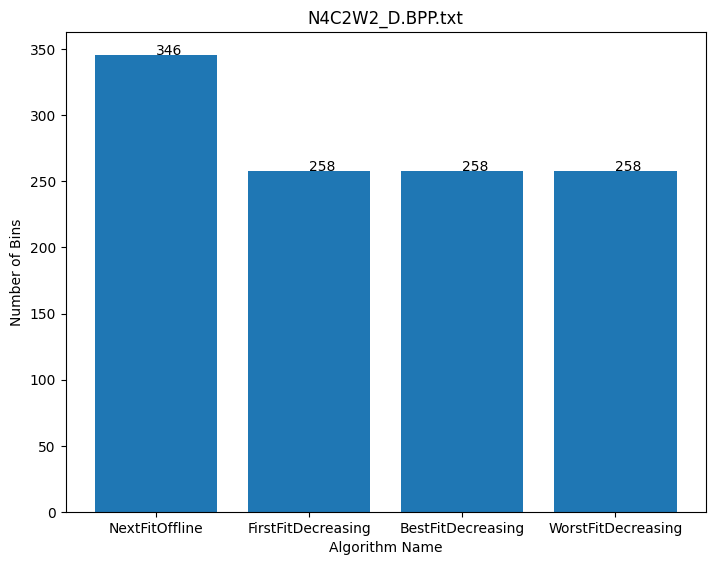

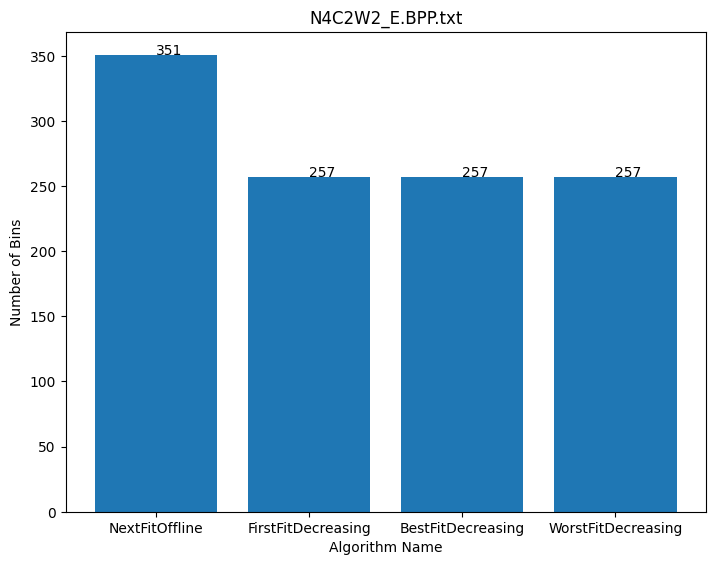

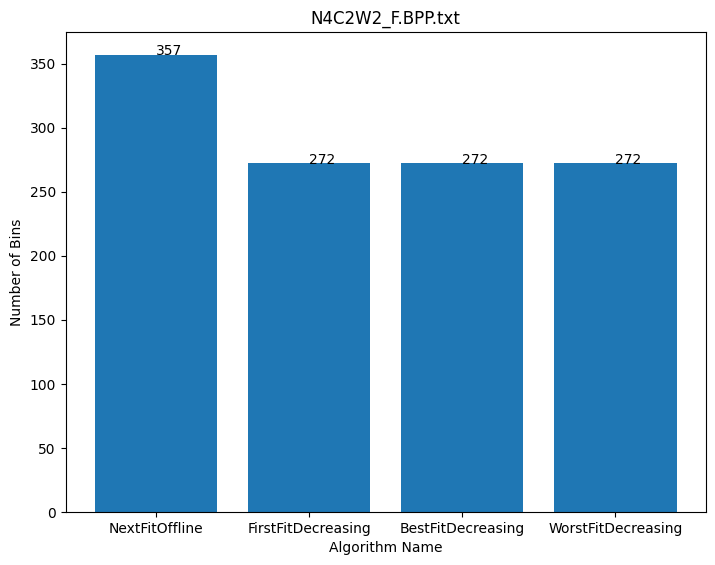

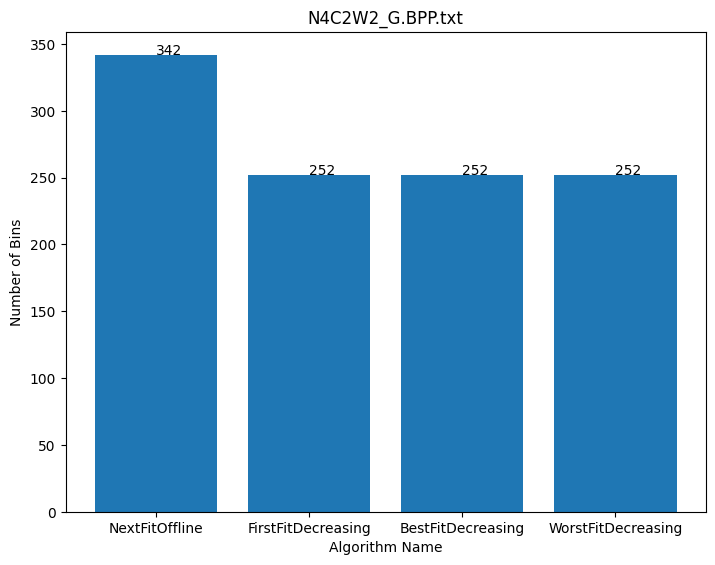

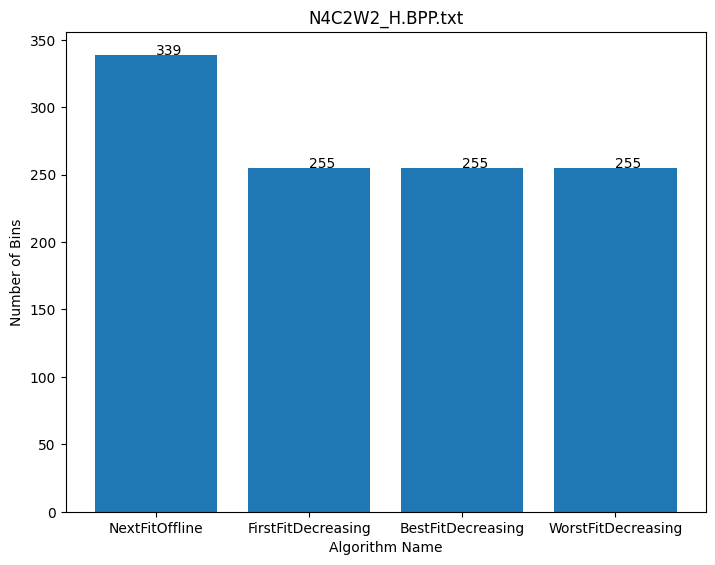

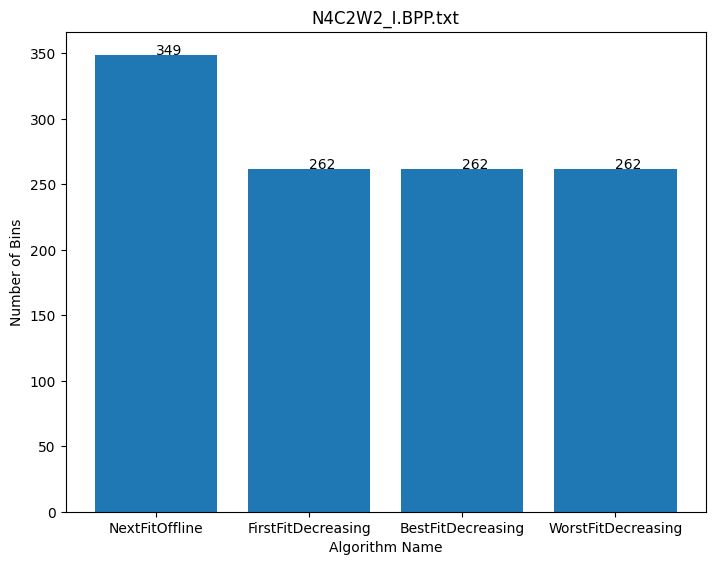

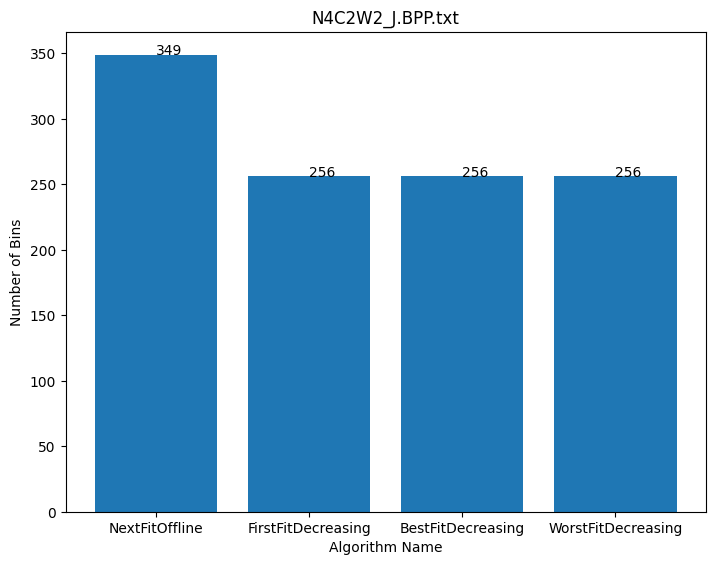

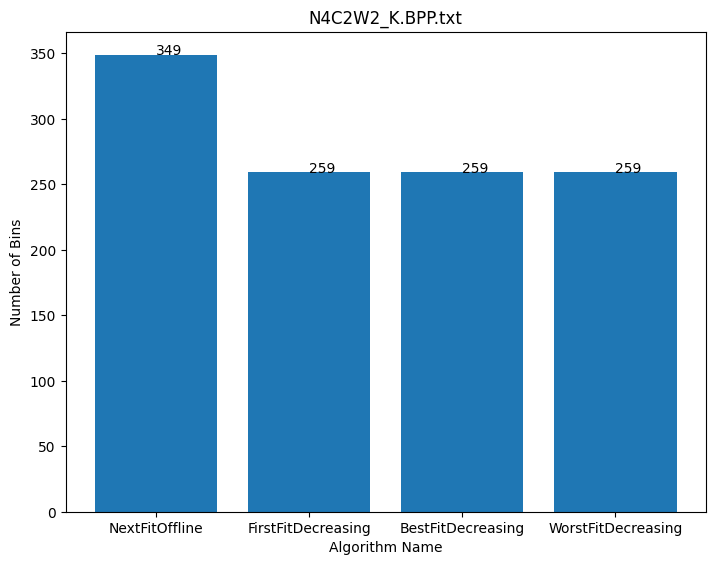

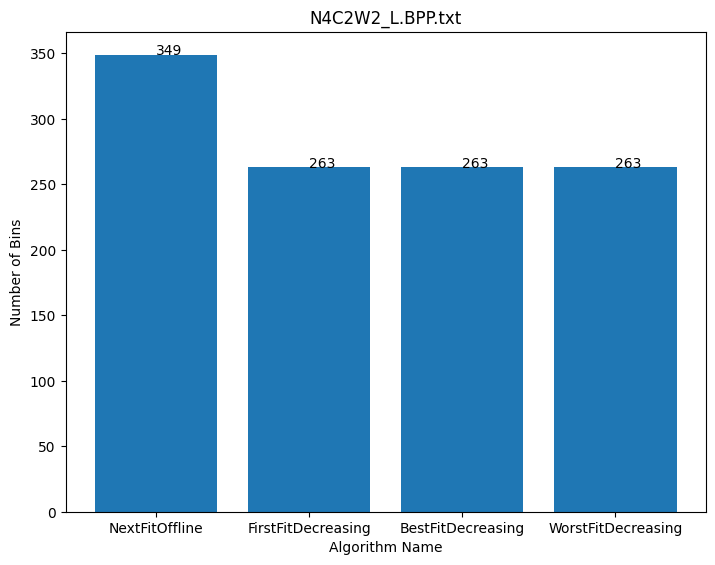

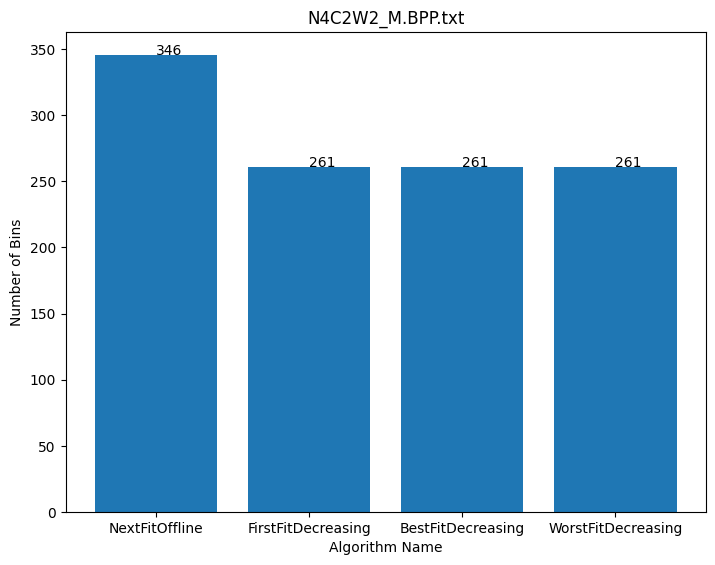

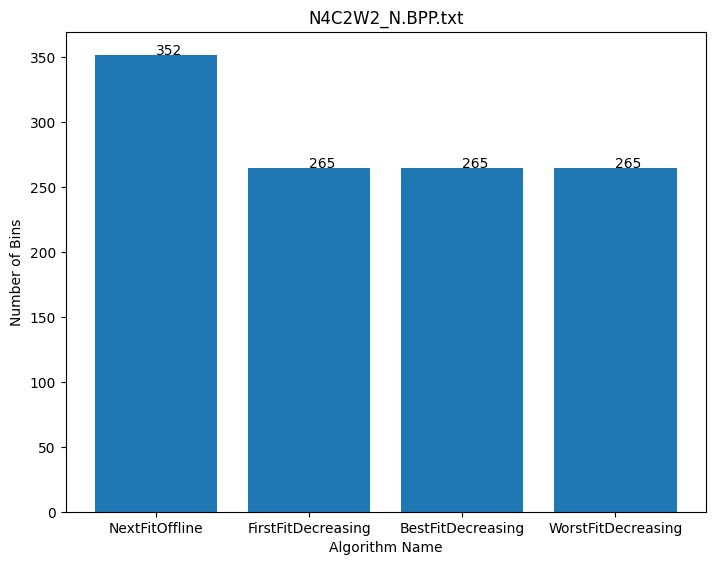

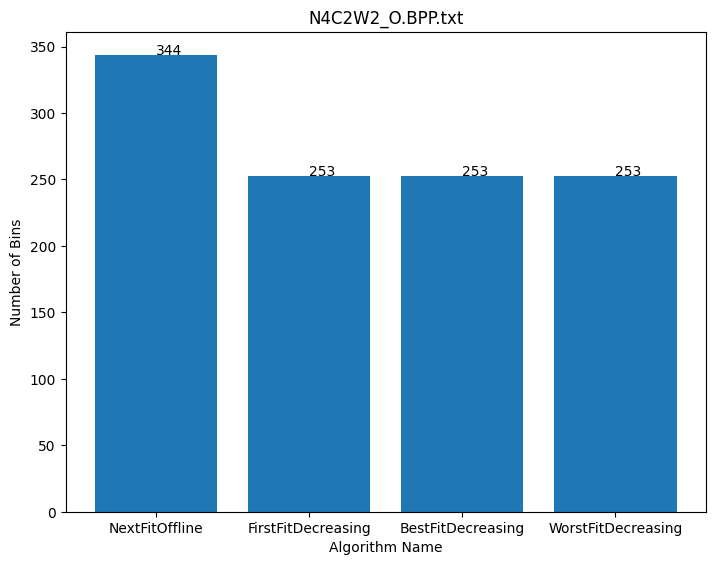

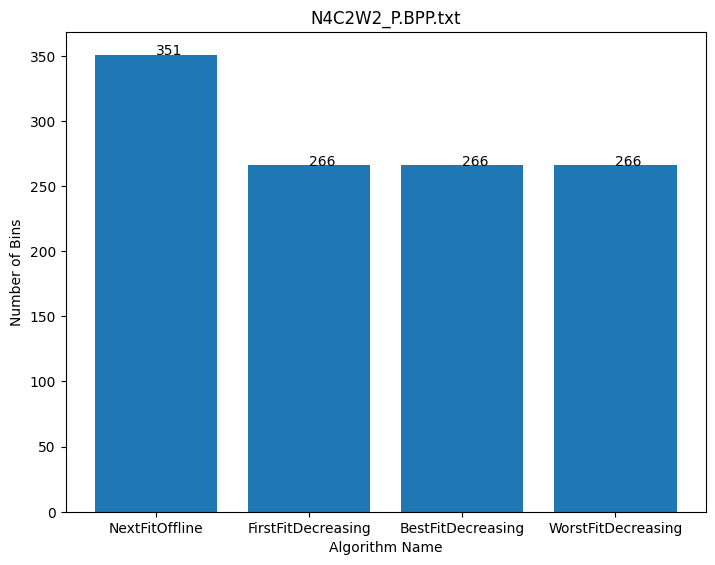

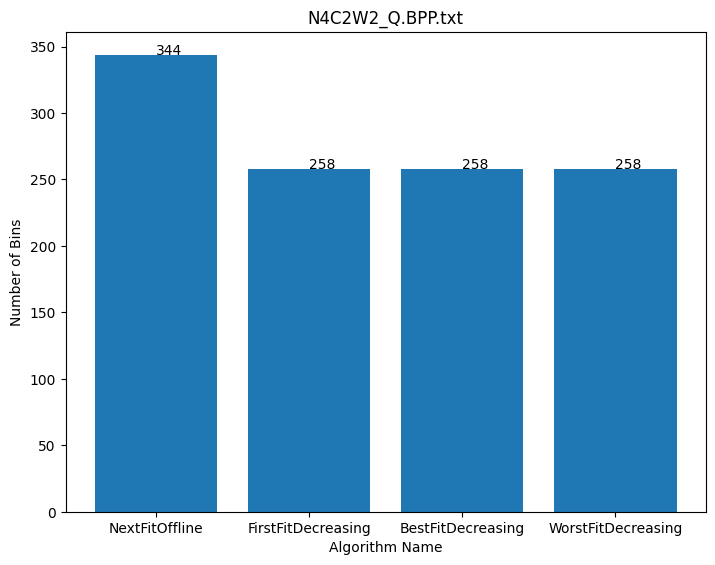

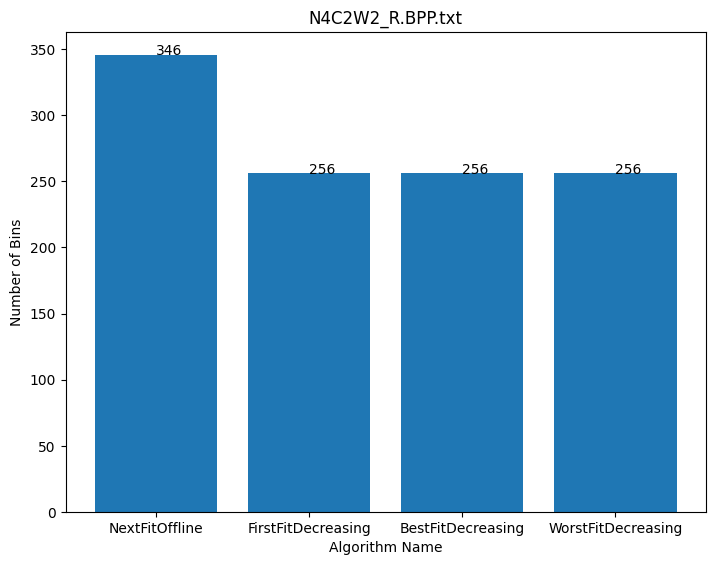

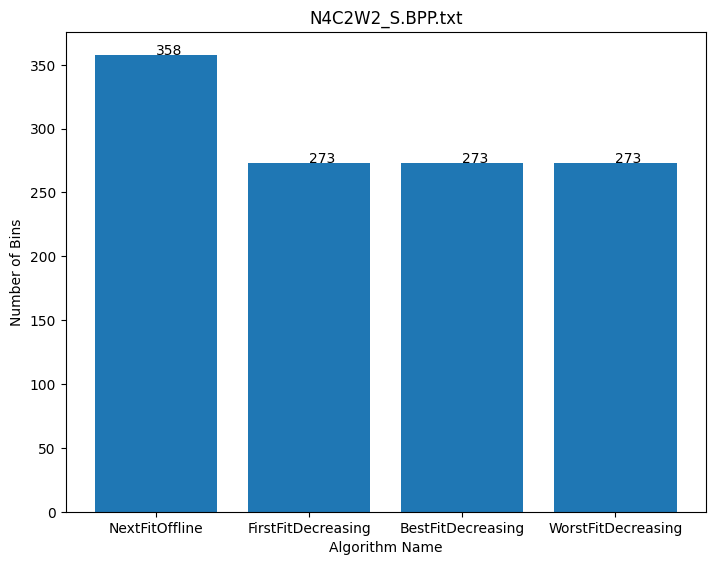

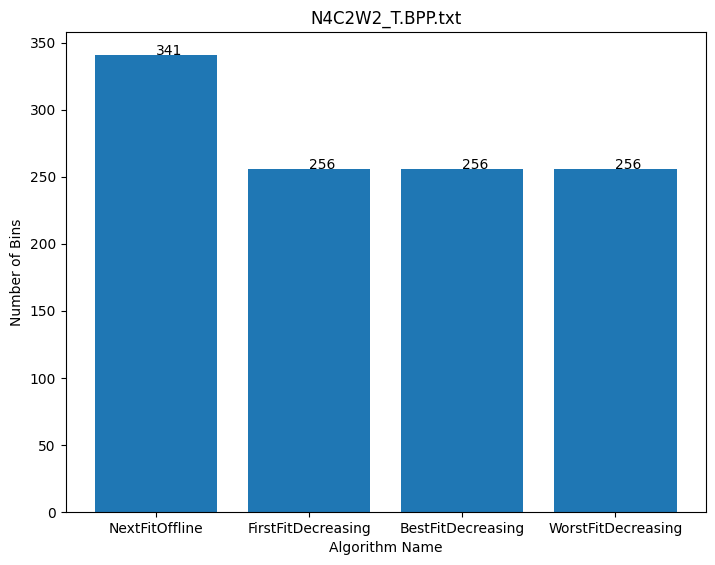

In [14]:
import numbins_bench
numbins_bench.main()
# if there is time, the sums of each bins in regards to the algorithms

##### Using pyperf, implement benchmarks to measure the execution time of your different implementations. Your report must mention which part of the dataset you used for benchmarking, and why is your benchmarking protocol relevant.

## T3 Tasks

Algorithm
['Optimal', 'NextFit', 'FirstFit', 'BestFit', 'WorstFit', 'OneFit', 'NextFitOffline', 'FirstFitDecreasing', 'BestFitDecreasing', 'WorstFitDecreasing', 'Benchmark']
HARD0.BPP.txt
[56, 64, 60, 60, 62, 200, 65, 59, 59, 59, 59]
HARD1.BPP.txt
[57, 65, 62, 62, 63, 200, 66, 60, 60, 60, 60]
HARD2.BPP.txt
[56, 66, 62, 62, 63, 200, 66, 60, 60, 60, 60]
HARD3.BPP.txt
[55, 65, 61, 61, 61, 200, 64, 59, 59, 59, 59]
HARD4.BPP.txt
[57, 66, 62, 62, 63, 200, 65, 60, 60, 60, 60]
HARD5.BPP.txt
[56, 65, 62, 62, 62, 200, 65, 59, 59, 59, 59]
HARD6.BPP.txt
[57, 65, 61, 61, 63, 200, 65, 60, 60, 60, 60]
HARD7.BPP.txt
[55, 63, 60, 60, 60, 200, 63, 59, 59, 59, 59]
HARD8.BPP.txt
[57, 65, 61, 61, 63, 200, 66, 60, 60, 60, 60]
HARD9.BPP.txt
[56, 65, 62, 62, 62, 200, 65, 60, 60, 60, 60]


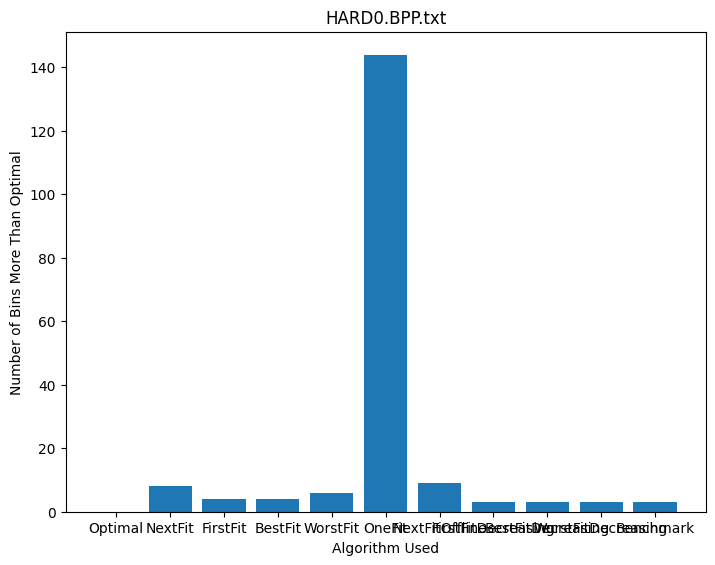

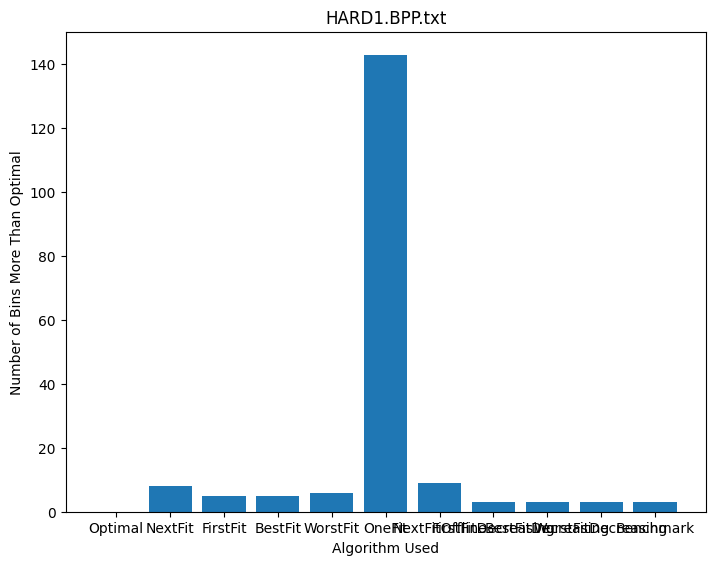

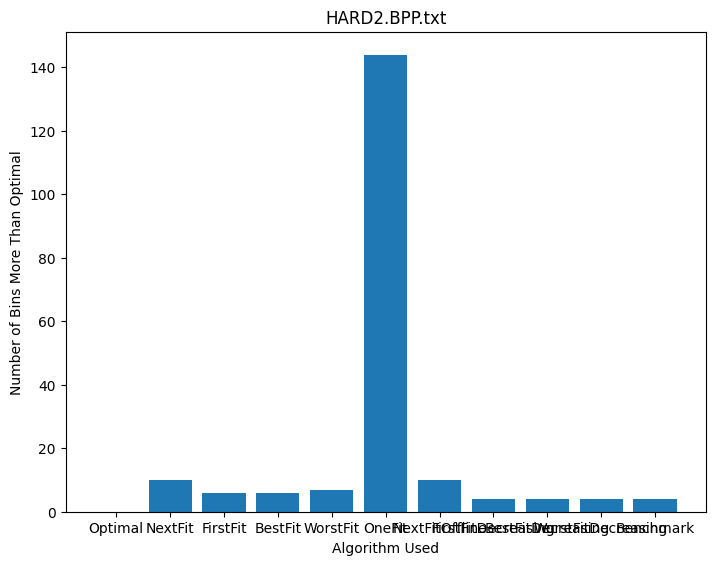

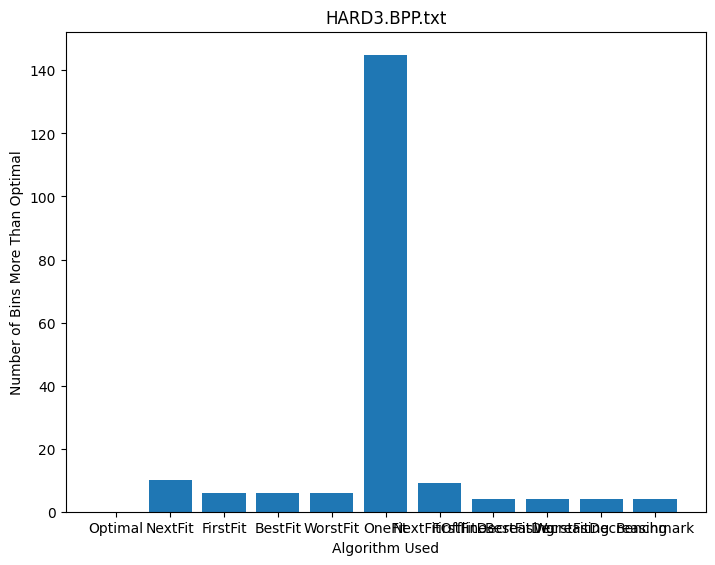

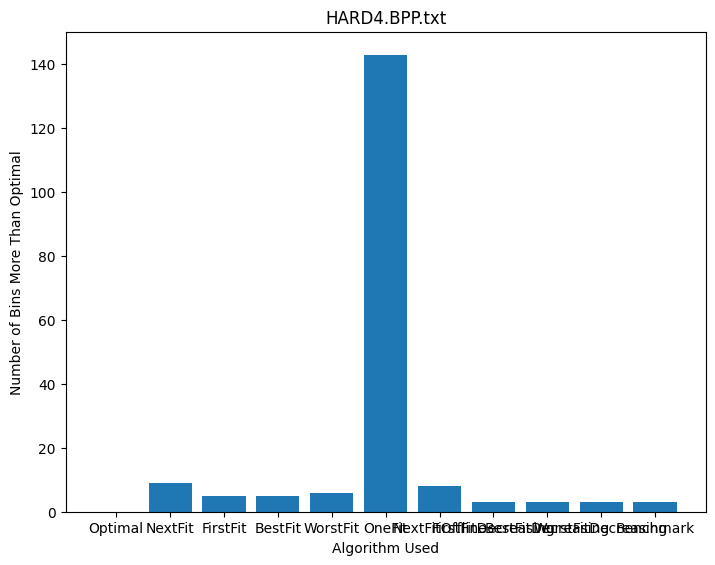

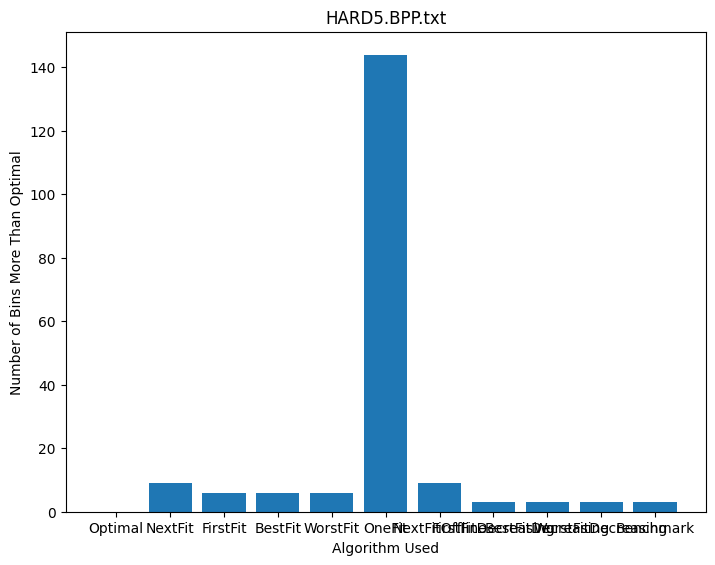

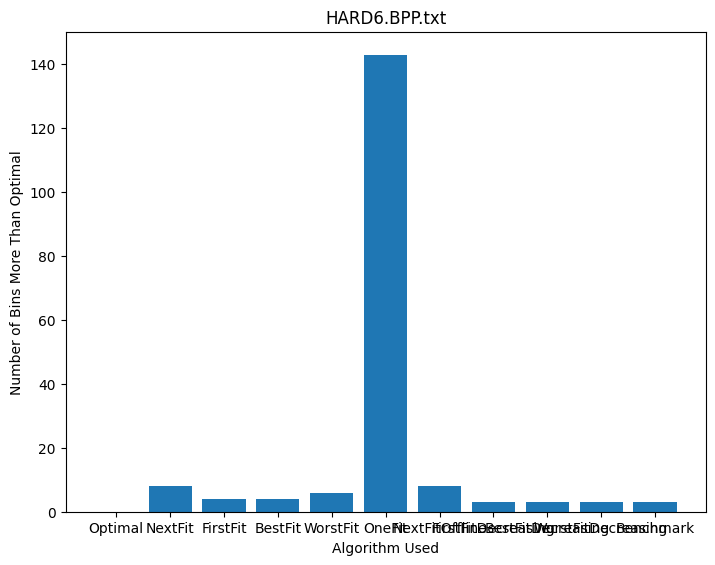

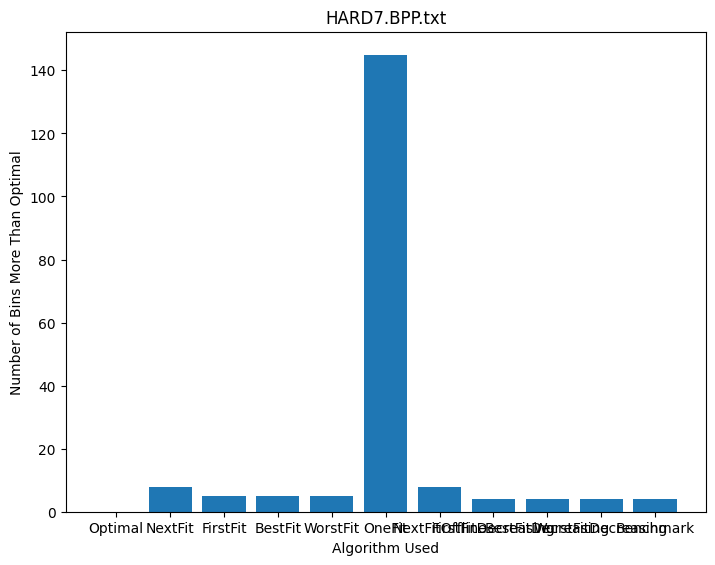

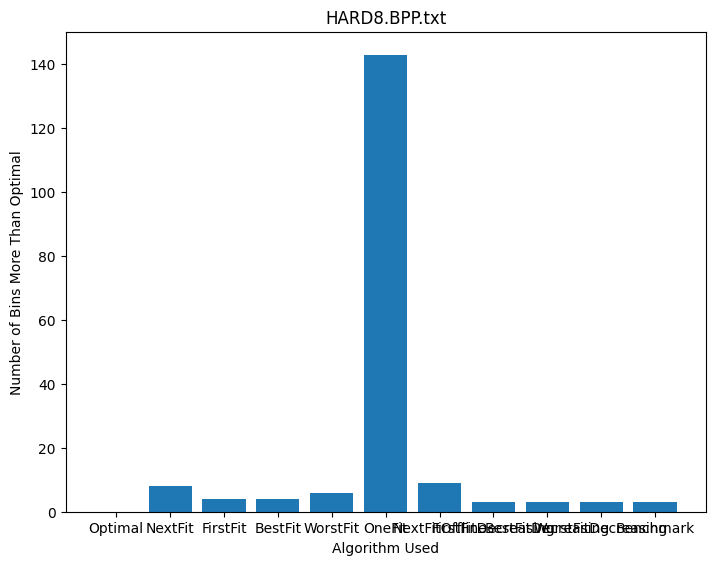

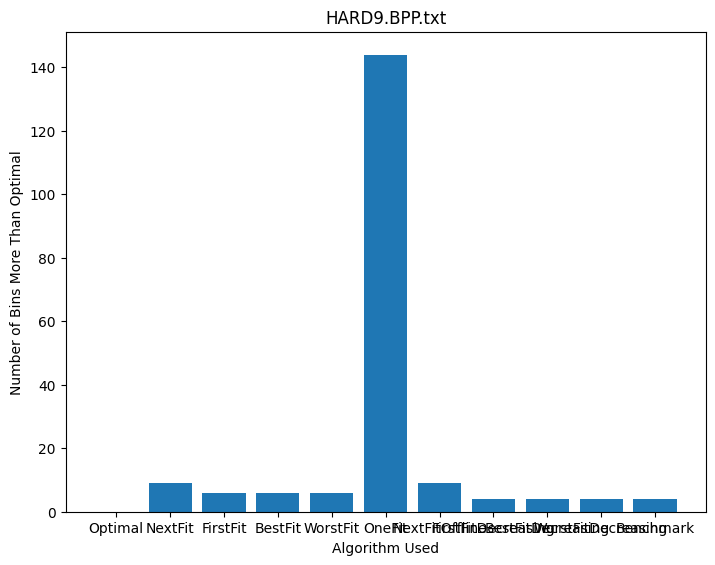

In [2]:
import experiment_moi
experiment_moi.main()